In [1]:
import os
import regex
import scipy
import matplotlib as mpl
import seaborn as sbn
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as lbd
import soundfile as sf
from scipy import signal
from datetime import datetime
import math


EXPATH = "A:/Thesis/notebooks/data/Kaggle/Smart Bee Colony Monitor - Clips of Beehive Sounds/sound_files/sound_files/"
PATH = "A:/Thesis/data/raw/Raw data/bombus/"
SAVE_PATH = "A:/Thesis/data/raw/edited/bombus"


pd.set_option('display.max_colwidth', 200)
species = ['hortorum', 'lapidarius', 'muscorum', 'pascuorum', 'soroeensis', 'sylvarum', 'terrestris']

In [2]:
print(f"""
librosa: {lb.__version__}
soundfile: {sf.__version__}
seaborn: {sbn.__version__}
matplotlib: {mpl.__version__}
numpy: {np.__version__}
scikit-learn: {sk.__version__}
pandas: {pd.__version__}
scipy: {scipy.__version__}
""")


librosa: 0.10.0
soundfile: 0.12.1
seaborn: 0.12.2
matplotlib: 3.5.3
numpy: 1.21.6
scikit-learn: 1.0.2
pandas: 1.1.5
scipy: 1.7.3



In [3]:
# data at: A:\Thesis\notebooks\data\Kaggle\Smart Bee Colony Monitor - Clips of Beehive Sounds\sound_files\sound_files
files = lb.util.find_files(PATH, ext=['wav'])
files = np.asarray(files)
files


array(['A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR001MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR001XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR002MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR002XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR003MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR003XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR004MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR004XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR005MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR005XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\

In [4]:
titles = []
extensions = []
durations = []
species = []
caste = []
files_filtered = []
dates = []
type_xyms = []

for i in range(0, len(files)):
    info = files[i].split('\\')[-2].split('_')
    if len(info) == 2:
        dates.append(datetime.strptime(files[i].split("\\")[-3], '%Y-%m-%d'))
        species.append(info[0].lower())
        caste.append(info[1].lower())
        titles.append(files[i].split("\\")[-1].split(".")[0])
        extensions.append(files[i].split("\\")[-1].split(".")[1].lower())
        durations.append(lb.get_duration(path=files[i]))
        files_filtered.append(files[i])
        xy_or_ms = 'XY' if 'XY' in files[i].split('\\')[-1].split('.')[0].upper() else 'MS'
        type_xyms.append(f"{xy_or_ms}")

# print(f"""
#     titles = {titles}
#     extensions = {extensions}
#     durations = {durations}
#     species = {species}
#     caste = {caste}
# """)

print(f"""
    dates = {len(dates)} - {type(dates[0])}
    titles = {len(titles)}
    types = {len(type_xyms)}
    extensions = {len(extensions)}
    species = {len(species)}
    caste = {len(caste)}
    durations = {len(durations)}
""")


    dates = 256 - <class 'datetime.datetime'>
    titles = 256
    types = 256
    extensions = 256
    species = 256
    caste = 256
    durations = 256



In [5]:
df = pd.DataFrame({
    "date": dates,
    "title": titles,
    "extension": extensions,
    "XY/MS": type_xyms,
    "species": species,
    "caste": caste,
    "location": files_filtered,
    "duration (s)": durations,
})
df

,date,title,extension,XY/MS,species,caste,location,duration (s)
0,2020-08-03,SR001MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR001MS.WAV,31.125333
1,2020-08-03,SR001XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR001XY.WAV,31.125333
2,2020-08-03,SR002MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR002MS.WAV,15.869333
3,2020-08-03,SR002XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR002XY.WAV,15.869333
4,2020-08-03,SR003MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR003MS.WAV,18.036000
...,...,...,...,...,...,...,...,...
251,2020-08-17,S1708W04_SR004XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W04_SR004XY.WAV,5.625333
252,2020-08-17,S1708W05_SR005MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W05_SR005MS.WAV,18.494667
253,2020-08-17,S1708W05_SR005XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W05_SR005XY.WAV,18.494667
254,2020-08-17,S1708W06_SR006MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W06_SR006MS.WAV,3.481333


In [6]:
df = df.sort_values(by="duration (s)", ascending=False).reset_index(drop=True)
df

,date,title,extension,XY/MS,species,caste,location,duration (s)
0,2020-08-14,S1408W07_SR007XY,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007XY.WAV,101.873333
1,2020-08-14,S1408W07_SR007MS,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007MS.WAV,101.873333
2,2020-08-14,S1408W22_SR022XY,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022XY.WAV,63.209333
3,2020-08-14,S1408W22_SR022MS,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022MS.WAV,63.209333
4,2020-08-14,S1408M04_SR004MS,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_males\S1408M04_SR004MS.WAV,49.308000
...,...,...,...,...,...,...,...,...
251,2020-08-14,S1408W03_SR003MS,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W03_SR003MS.WAV,3.048000
252,2020-08-13,SR002MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\SR002MS.WAV,2.248000
253,2020-08-13,S1308W02_SR002XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\S1308W02_SR002XY.WAV,2.248000
254,2020-08-13,S1308W02_SR002MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\S1308W02_SR002MS.WAV,2.248000


In [7]:
df_xy = df[(df['XY/MS'] == 'XY')]
df_ms = df[(df['XY/MS'] == 'MS')]

In [8]:
df_xy

,date,title,extension,XY/MS,species,caste,location,duration (s)
0,2020-08-14,S1408W07_SR007XY,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007XY.WAV,101.873333
2,2020-08-14,S1408W22_SR022XY,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022XY.WAV,63.209333
5,2020-08-14,S1408M04_SR004XY,wav,XY,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_males\S1408M04_SR004XY.WAV,49.308000
7,2020-08-03,SR007XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR007XY.WAV,47.008000
8,2020-08-06,SR003XY,wav,XY,terrestris,male,A:\Thesis\data\raw\Raw data\bombus\2020-08-06\terrestris_male\SR003XY.WAV,41.817333
...,...,...,...,...,...,...,...,...
246,2020-08-12,SR001XY,wav,XY,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\SR001XY.WAV,3.132000
248,2020-08-12,S1208M01_SR001XY,wav,XY,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\S1208M01_SR001XY.WAV,3.132000
250,2020-08-14,S1408W03_SR003XY,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W03_SR003XY.WAV,3.048000
253,2020-08-13,S1308W02_SR002XY,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\S1308W02_SR002XY.WAV,2.248000


In [9]:
df_ms

,date,title,extension,XY/MS,species,caste,location,duration (s)
1,2020-08-14,S1408W07_SR007MS,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007MS.WAV,101.873333
3,2020-08-14,S1408W22_SR022MS,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022MS.WAV,63.209333
4,2020-08-14,S1408M04_SR004MS,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_males\S1408M04_SR004MS.WAV,49.308000
6,2020-08-03,SR007MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR007MS.WAV,47.008000
9,2020-08-06,SR003MS,wav,MS,terrestris,male,A:\Thesis\data\raw\Raw data\bombus\2020-08-06\terrestris_male\SR003MS.WAV,41.817333
...,...,...,...,...,...,...,...,...
247,2020-08-12,SR001MS,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\SR001MS.WAV,3.132000
249,2020-08-12,S1208M01_SR001MS,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\S1208M01_SR001MS.WAV,3.132000
251,2020-08-14,S1408W03_SR003MS,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W03_SR003MS.WAV,3.048000
252,2020-08-13,SR002MS,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\SR002MS.WAV,2.248000


In [10]:
def write_save(df, signal, i, sr, save_path, save_title=None):
    try:
        os.mkdir(f"{SAVE_PATH}/{df.loc[i, 'species']}")
    except FileExistsError:
        pass
    try:
        os.mkdir(f"{SAVE_PATH}/{df.loc[i, 'species']}/{df.loc[i, 'caste']}")
    except FileExistsError:
        pass
    try:
        os.mkdir(f"{SAVE_PATH}/{df.loc[i, 'species']}/{df.loc[i, 'caste']}/figures/")
    except FileExistsError:
        pass
    try:
        os.mkdir(f"{SAVE_PATH}/figures/")
    except FileExistsError:
        pass
    sf.write(f"{save_path}/{save_title}.wav", data=signal, samplerate=sr, subtype='PCM_24')

In [11]:
def amplitude_vs_time(data=df, title="amplitude vs. time", filter = False, start_index = 0, end_index = 20, save=False):
    signal_container = []
    plt.clf()
    plt.figure(figsize=(25, 10))
    title = ""
    for i in range(start_index, min(len(data), end_index)):
        if i != start_index and i != min(len(data), end_index): title += " + "
        species = data.loc[i, 'species']
        date = f"{data.loc[i, 'date'].year}_{data.loc[i, 'date'].month:02d}_{data.loc[i, 'date'].day}"
        save_path = f"{SAVE_PATH}/{species}/{data.loc[i, 'caste']}"
        save_title = f"{date}_{data.loc[i, 'title']} - {'EDITED' if filter else 'PROCESSED'}"
        signal, sr = sf.read(data.loc[i, 'location'])
        signal_container.append({'signal': signal, 'samplerate': sr})
        time = np.linspace(0, len(signal) / sr, len(signal))
        title_i = data.loc[i, "title"]
        left_channel = signal[:, 0]
        right_channel = signal[:, 1]
        plt.plot(time, left_channel, label=f"L ({title_i} - {species})")
        plt.plot(time, right_channel, label=f"R ({title_i} - {species})")
        title += title_i
        if save: write_save(data, signal, i, sr, save_path, save_title)
    plt.legend(loc='upper right')
    plt.title(f'\n{title}\n')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel("\nAmplitude (Db)\n\n")
    plt.xlabel("\n\nTime (s)\n")
    plt.savefig(save_path + '/figures/' + save_title + '.png')
    plt.savefig(SAVE_PATH + '/figures/' + save_title + '.png')
    plt.show()
    return signal_container

In [12]:
df.loc[0]

date                                                                              2020-08-14 00:00:00
title                                                                                S1408W07_SR007XY
extension                                                                                         wav
XY/MS                                                                                              XY
species                                                                                    terrestris
caste                                                                                         workers
location        A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007XY.WAV
duration (s)                                                                                  101.873
Name: 0, dtype: object

<Figure size 640x480 with 0 Axes>

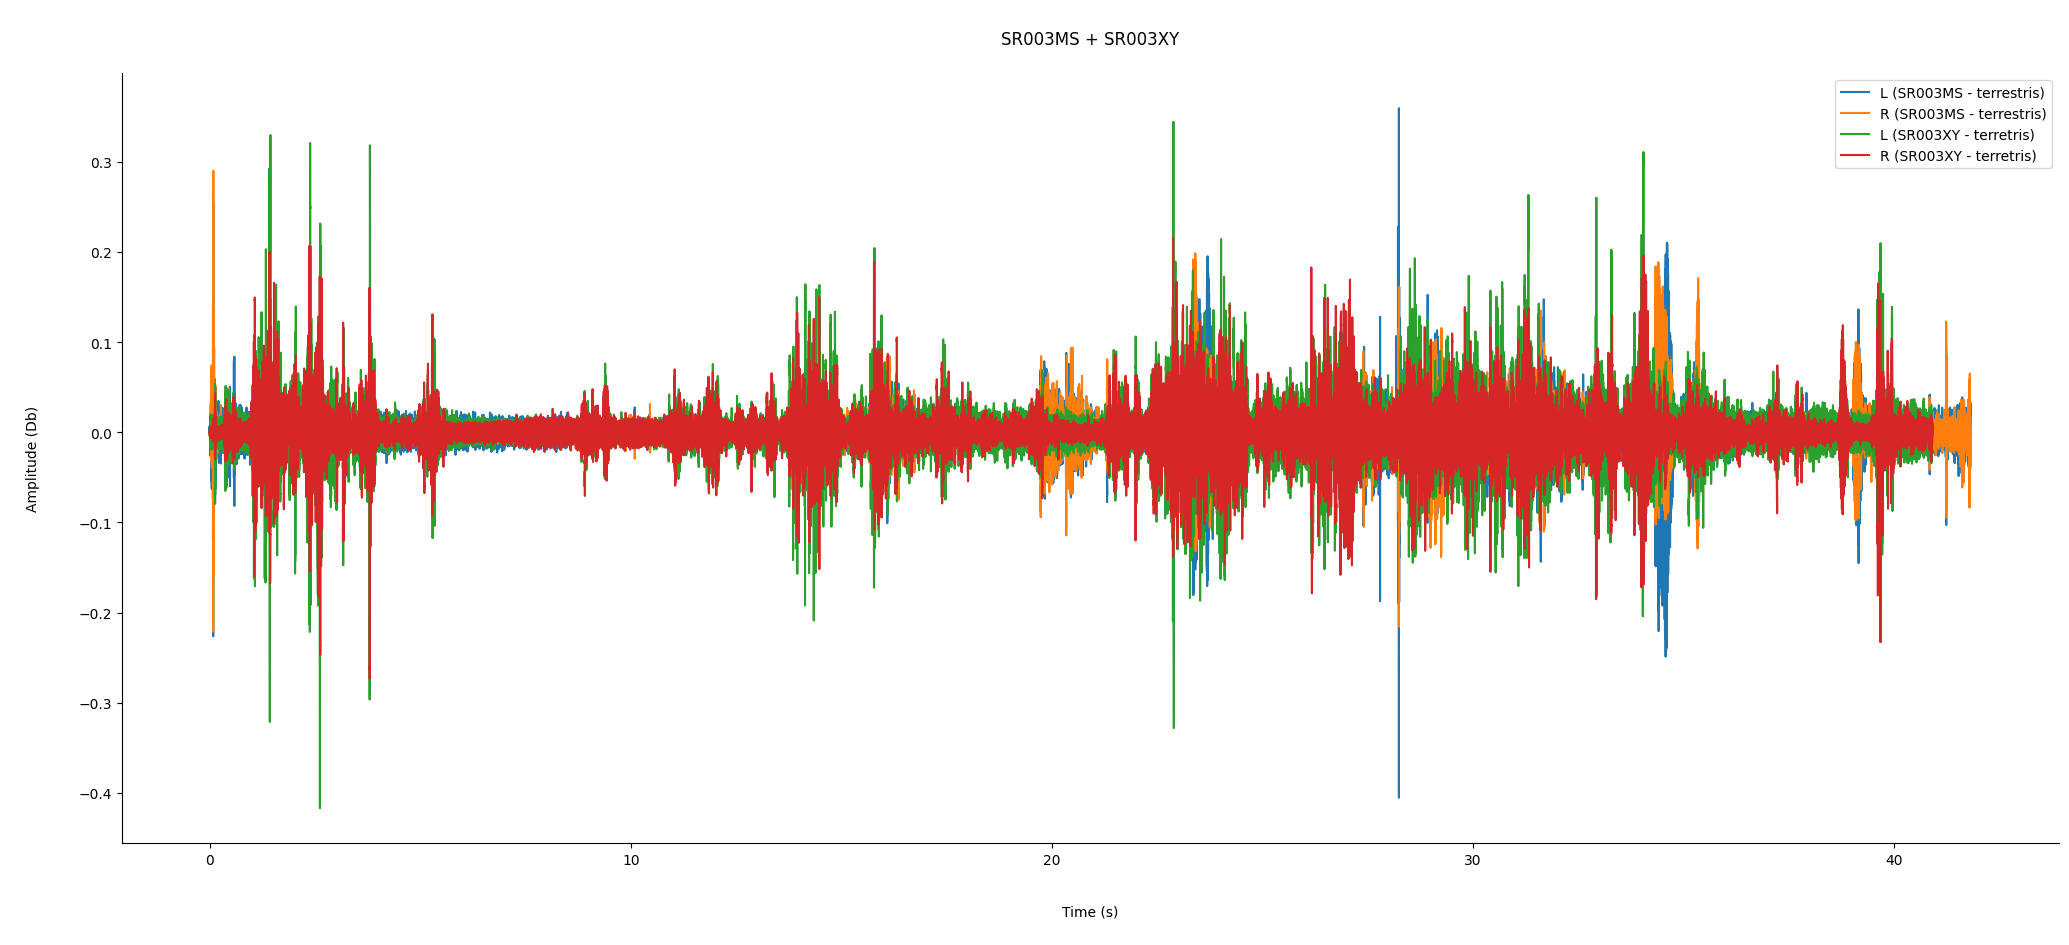

In [13]:
signal_container = amplitude_vs_time(title="Mixed species sound aplitude vs. time", start_index=9, end_index=11, save=True)
# print(signal_container[0]['signal'], signal_container[0]['samplerate'])



In [14]:
i = 0
signal = [entry['signal'] for entry in signal_container][i]
sr = [entry['samplerate'] for entry in signal_container][i]
signal_left = signal[:, 0]
signal_right = signal[:, 1]
duration_s = len(signal) / sr
[np.max(signal_left), duration_s, sr, int(sr*duration_s), len(signal)] 

[0.35978472232818604, 41.81733333333333, 48000, 2007231, 2007232]

In [15]:
STEPS_SECONDS = 0.3
progress_s = 0
sample_count = 0
cutoff_lower = 0.0000000001
cutoff_higher = 0.445
cutoff_thud = 2
print(signal, flush=True)
while progress_s < duration_s:
    steps_s = round(min(duration_s - progress_s, STEPS_SECONDS), 2)
    samples = int(sr * steps_s)
    segement_start = int(sr * progress_s)
    segement_end = segement_start + samples
    # segment = duration_s / steps
    # if segments % math.floor(segments) > 0.01: segments = math.ceil(segments)
    # else: math.floor(segments)
    # for i in range(segement_start, segement_end):
    #     try:
    #         if abs(signal_left[i]) > cutoff_thud: signal_left[segement_start:segement_end] = 0.0
    #         if abs(signal_right[i]) > cutoff_thud: signal_right[segement_start:segement_end] = 0.0
    #     except IndexError:
    #         break
    try:
        maximum = np.max(abs(signal[segement_start: segement_end]))
        minimum = np.min(abs(signal[segement_start: segement_end]))
    except ValueError:
        break
    # print(minimum, flush=True)
    # print(abs(signal[segement_start: segement_end]), flush=True)
    if minimum < cutoff_lower or maximum > cutoff_higher: signal[segement_start:segement_end] = 0.0
    progress_s += steps_s
    progress_s = round(progress_s, 2)
    print(f"{progress_s} / {duration_s}\t--Segment Start | End: {segement_start} | {segement_end} (batch size {samples} out of {int(sr*duration_s)} : balance {int(len(signal) - int(sr * progress_s))})", flush=True)
print(signal)


[[-4.64916229e-06  6.43730164e-06]
 [-5.48362732e-06  1.83582306e-05]
 [ 5.60283661e-06  2.90870667e-05]
 ...
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]
0.3 / 41.81733333333333	--Segment Start | End: 0 | 14400 (batch size 14400 out of 2007231 : balance 1992832)
0.6 / 41.81733333333333	--Segment Start | End: 14400 | 28800 (batch size 14400 out of 2007231 : balance 1978432)
0.9 / 41.81733333333333	--Segment Start | End: 28800 | 43200 (batch size 14400 out of 2007231 : balance 1964032)
1.2 / 41.81733333333333	--Segment Start | End: 43200 | 57600 (batch size 14400 out of 2007231 : balance 1949632)
1.5 / 41.81733333333333	--Segment Start | End: 57600 | 72000 (batch size 14400 out of 2007231 : balance 1935232)
1.8 / 41.81733333333333	--Segment Start | End: 72000 | 86400 (batch size 14400 out of 2007231 : balance 1920832)
2.1 / 41.81733333333333	--Segment Start | End: 86400 | 100800 (batch size 14400 out of 2007231 : balance 19064

#### Modified amplitude over time domain

2007232


<Figure size 640x480 with 0 Axes>

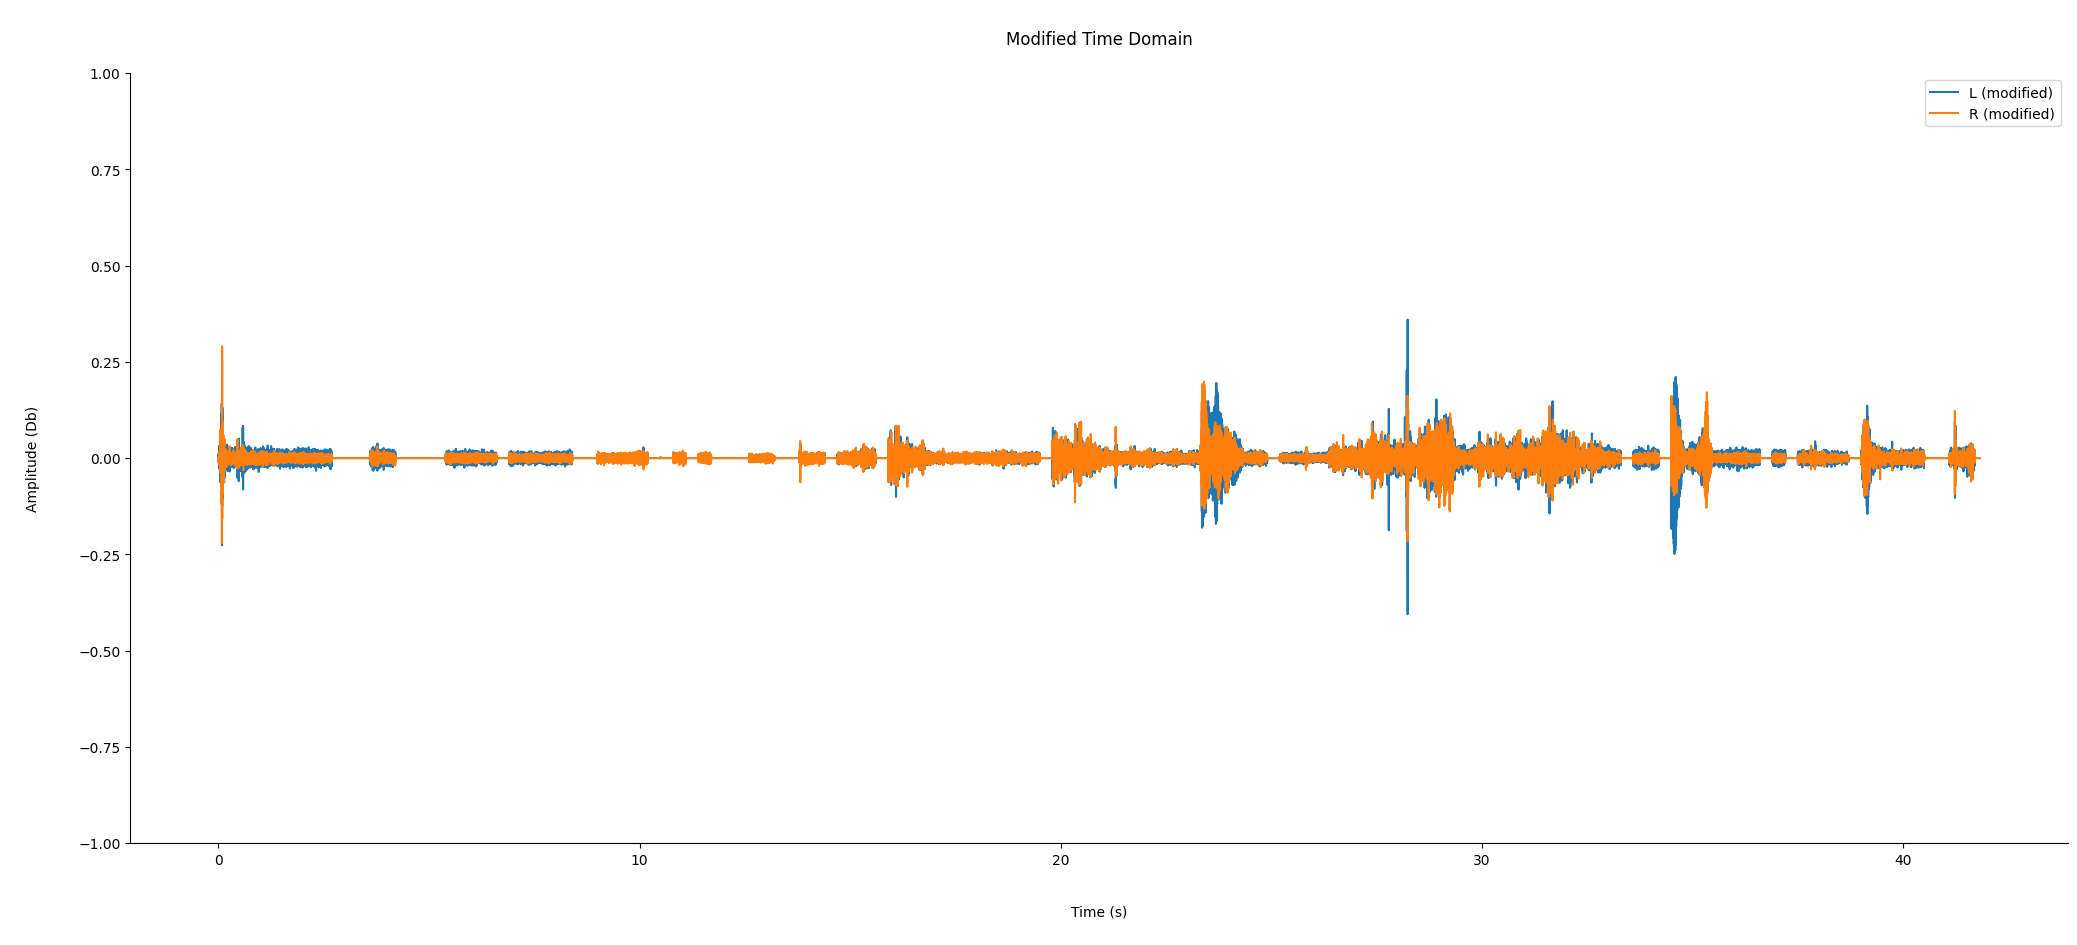

In [16]:
plt.clf()
plt.figure(figsize=(25, 10))
title = "Modified Time Domain"
time = np.linspace(0, len(signal) / sr, len(signal))
left_channel = signal[:, 0]
right_channel = signal[:, 1]
plt.plot(time, signal_left, label=f"L (modified)")
plt.plot(time, signal_right, label=f"R (modified)")
plt.legend(loc='upper right')
plt.title(f'\n{title}\n')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("\nAmplitude (m)\n\n")
plt.xlabel("\n\nTime (s)\n")

try:
    os.mkdir(f"{SAVE_PATH}/filter")
except FileExistsError:
    pass
sf.write(f"{SAVE_PATH}/filter/filtered.wav", data=signal, samplerate=sr, subtype='PCM_24')
print(len(signal), flush=True)
plt.show()

In [17]:
# for i in range(0, len(df), 2):
#     amplitude_vs_time(title=df.loc[1, 'title'], start_index=i, end_index=i+2, save=True)


### High Pass frequency filter using Nyquist Frequency and Butterworth bandpass filtering

In [18]:
audio, sr = lb.load(df.loc[0, 'location'])

cutoff_freq = 10  # Hz -- alleged lowest frequency of Bombus spp.
nyquist_freq = sr / 2.0
norm_cutoff_freq = cutoff_freq / nyquist_freq

butter_filter = signal.butter(10, norm_cutoff_freq, btype="highpass", output='sos')  # sos = second-order-section
audio_filtered = signal.sosfiltfilt(butter_filter, audio)


plt.figure(figsize=(25, 10))
sf.write(f"{SAVE_PATH}/filtered-{df.loc[0, 'title']}.wav", data=audio_filtered, samplerate=sr, subtype='PCM_24')
lbd.waveshow(audio_filtered, sr=sr, label=f"Filtered - {df.loc[0, 'title']}")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'butter'

C:\Users\Sam Hurenkamp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  


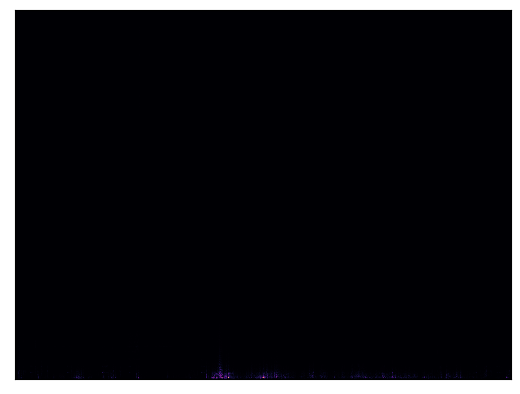

In [ ]:
stft = lb.stft(audio)
lb.display.specshow(stft)